## Project: Wrangling and Analyzing Data Analysis and Visualisation using Twitter API for WeRateDogs Dataset

## i. Data Gathering

In the cell below, I gathered all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.



1.Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [461]:
#importing the important libraries
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [462]:
# downloading the first data set from a csv file
t_archive = pd.read_csv('twitter-archive-enhanced.csv',sep = ',')


2.Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [463]:
# using the request library to programically download the image prediction
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [464]:
# Saving the https content to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [465]:
# reading the file into a data frame 
t_image=pd.read_csv('image-predictions.tsv',sep='\t')


3.Using the Tweepy library to query additional Data via the Twitter API

In [466]:
tweet_ids = t_archive.tweet_id.values
len(tweet_ids)


2356

In [467]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#t_archive is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

## ii. Assessing Data
In this section, detect and document at least eight (8) quality issues and two (2) tidiness issue. You must use both visual assessment programmatic assessement to assess the data.

#### The twitter enhanced data set: the data set contains 2354 rows and 17 columns which are:

1. tweet_id : identification number 
2. in_reply_to_status_id
3. in_reply_to_user_id
4. Timestamp: date the tweet was made
5. Source: url link
6. text : actual text of the tweet
7.  retweeted_status_id: the retweet id number
8. retweeted_status_user_id: retweet user id number
9.  retweeted_status_timestamp: when the retweet occured • expanded_urls :
10.  rating_numerator :
11.  rating_denominator
12.  name : name of the dog
13.  doggo : dog stage
14.  floofer : dog stage
15.  pupper : dog stage
17. Puppo: dog stage

#### The image predictions data set: the data set contained 2075 row and 12 columns which are

tweet_id: tweet identification number
. jpg_url: image link 
. img_num: the number of images since twitter allows 4 images• p1: the algorithm's #1 prediction for the image in the tweet
1. p1: the algorithm's #1 prediction for the image in the tweet
2. p1_conf : how confident the algorithm is in its #1 prediction
3. p1_dog : whether or not the #1 prediction is a breed of dog
4. p2: the algorithm's #2 prediction for the image in the tweet
5. p2_conf : how confident the algorithm is in its #2 prediction
6. p2_dog: whether or not the #2 prediction is a breed of dog
7. p3: the algorithm's #3 prediction for the image in the tweet
8. p3_conf : how confident the algorithm is in its #3 prediction
9. p3_dog: whether or not the #1 prediction is a breed of dog



In [360]:
# 1 DATA: the twitter-archive-enhanced table 
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [361]:
 #getting an overview of the dataset
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [362]:
# getting the mean and max count
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [363]:
# getting the value count for the names
t_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [364]:
t_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [365]:
t_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [366]:
# Visually review text and rating_numerator and see if anything incorrect.
t_archive.query('rating_numerator >= 20')[['text','rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420
189,@s8n You tried very hard to portray this good ...,666
290,@markhoppus 182/10,182
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
433,The floofs have been released I repeat the flo...,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
902,Why does this never happen at my front door......,165


In [367]:
# Visually check text and rating_denominator and see if anything incorrect.
t_archive.query('rating_denominator >=20')[['text','rating_denominator']]


,text,rating_denominator
433,The floofs have been released I repeat the flo...,70
902,Why does this never happen at my front door......,150
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",50
1351,Here is a whole flock of puppers. 60/50 I'll ...,50
1433,Happy Wednesday here's a bucket of pups. 44/40...,40


In [368]:
# getting the sum of null values in reply status
sum(t_archive.in_reply_to_status_id.isnull())

2278

In [369]:
# getting the sum of null values in retweeted status
sum(t_archive.retweeted_status_id.isnull())

2175

In [370]:
# value count of duplicated values in reweet
t_archive.retweeted_status_id.duplicated().value_counts()

True     2174
False     182
Name: retweeted_status_id, dtype: int64

In [371]:
# checking overview of the duplicated value in the table.
t_archive[t_archive.retweeted_status_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [372]:
# checking overview of the duplicated value in the table.
t_archive[t_archive.retweeted_status_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [373]:
# checking if any twwet is passed 2017-08-01
t_archive[t_archive.timestamp >= '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [374]:
# 2. Data 2: image data set containing images of dogs and confidence level
t_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [375]:
# the numbers of row and column the data contain
t_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [376]:
#getting an overview of the dataset with max and min number
t_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [377]:
# value count in p1_dog if the image is dog or not
t_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [378]:
# sum of duplicated values in the image data
sum(t_image.duplicated())

0

In [379]:
#sum of duplicated values in jpg_url
sum(t_image.jpg_url.duplicated())

66

In [380]:
# Data 3:Additional Data via the Twitter API

In [381]:
r_json= pd.read_json('tweet_json.txt',lines=True)
r_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [382]:
#  number of row and column and data types
r_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [383]:
# to get the columes name that are common in the three data set which can be used as primary key for merging
all_columns = pd.Series(list(t_archive) + list(r_json) + list(t_image))
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
49                 tweet_id
dtype: object

### Assesment issues
  i. Twitter enhanced table

1. Not all column are needed for this analysis which needs to be droped
2. The denominator of the ratings should not be 0.
3. the doggo,floofer,pupper,and puppo should be a single column and a category type of data
4. The "retweeted_status_id,in_reply_to_status_id" column have lot of null values
5. The name column has lot of undefined values
6. Timestamp is datetime instead of string and the timestamp later than August 1st, 2017 should be removed.



ii.image prediction


1. some images and false and are not dogs
2. the url has duplicated links



iii. Additional Data via the Twitter API table:

1. the id columns is not the same with other values

### Quality issues

i. Twitter archive table

1. Droping the rows in "retweeted_status_id,in_reply_to_status_id" column where it has a value other than 'Null" to get only real tweets.
2. Droping columns that are empty
3. Joining the ratings_ columns into one
4. dogcreating a single column for the dog stageso,floofer,pupper,and puppo to categories
5. creating a single column for the dog stages
6. timestamp to datetime
7. changing the undefined name and None to nan



ii.image prediction

8. removing all columns where p1_dog,p2_dog and p3_dog is false

iii. Additional Data via the Twitter API table:

9. changing the id column name to tweet_id

### Tidiness issue

i. Twitter enhanced table

1. doggo, floofer, pupper, and puppo do not follow the tidy data rule, values should not be column names, so these columns should be transposed into one column named dog_stage.
2. merge all tables into a master table.

### Cleaning Data

* in this section i will be cleaning all the issues documented while accessing.

In [384]:
 #Make copies of original pieces of data
t_archive_clean = t_archive.copy()

t_image_clean = t_image.copy()

r_json_clean = r_json.copy()



### Issue #1: Droping the rows in "retweeted_status_id,in_reply_to_status_id" column where it has a value other than 'Null" to get only real tweets.

In [385]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define;


To get only the tweets and not retweets

In [386]:
values_1 = t_archive_clean.retweeted_status_id[t_archive_clean.retweeted_status_id.notnull()]
values_2 = t_archive_clean.in_reply_to_status_id[t_archive_clean.in_reply_to_status_id.notnull()]   

In [387]:
t_archive_clean = t_archive_clean[t_archive_clean['retweeted_status_id'].isin(values_1) == False]
t_archive_clean = t_archive_clean[t_archive_clean['in_reply_to_status_id'].isin(values_2) == False]


In [388]:
#checking for overview of my data 
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Droping columns that are empty  

#### Define
droping in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls

#### Code

In [389]:
t_archive_clean .drop(t_archive_clean.columns[[1,2,6,7,8,9]],axis = 1, inplace = True)

In [390]:
#checking to confirm if unwanted columns where dropped
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #3: Joining the ratings_ columns into one

#### Define

i. Joining the ratings_ columns into one

ii.Drop the old column

#### code

In [391]:
# joining the two column into 1 named rating
t_archive_clean['rating']= t_archive_clean['rating_numerator'].apply(str)  + '/' + t_archive_clean['rating_denominator'].apply(str) 

In [392]:
# droping the rating_ columns
t_archive_clean.drop(['rating_numerator','rating_denominator'],axis =1, inplace=True)

In [393]:
#getting the value counts for the first 15
t_archive_clean['rating'].value_counts()[:15]

12/10    486
10/10    436
11/10    413
13/10    287
9/10     152
8/10      98
7/10      51
14/10     38
5/10      34
6/10      32
3/10      19
4/10      15
2/10       9
1/10       4
80/80      1
Name: rating, dtype: int64

#### Test

In [394]:
t_archive_clean.sample(15)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
927,754856583969079297,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,Winnie,None,None,None,None,11/10
238,847116187444137987,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,None,None,None,None,None,11/10
2234,668190681446379520,2015-11-21 22:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,Skittles,None,None,None,None,12/10
2306,666835007768551424,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,None,None,None,None,None,10/10
807,771908950375665664,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,None,doggo,None,None,None,13/10
1447,696488710901260288,2016-02-08 00:20:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 revolutionary af https://t.co/zKzq4nIY86,None,None,None,None,None,12/10
997,748324050481647620,2016-06-30 01:15:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,Duke,None,None,None,None,11/10
1162,723688335806480385,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,Reginald,None,None,None,None,12/10
1567,687826841265172480,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,Louis,None,None,None,None,12/10
1035,744995568523612160,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,Abby,None,None,None,puppo,9/10


### Issue #4,5,6: Changing data types

#### Define

* doggo,floofer,pupper,and puppo to categories
* timestamp to datetime
* changing the undefined name and None to Nan



#### Code

In [395]:
# converting doggo,floofer,pupper,and puppo to categories
t_archive_clean[['doggo','floofer','pupper','puppo']]=t_archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: x.astype('category'))

In [396]:
#change the timestamp to datetime
t_archive_clean['timestamp']=t_archive_clean['timestamp'].apply(pd.to_datetime, errors='coerce')

In [397]:
#changing the undefined name and none columns to Nan
undefined= (["a","an","the","all","his","my","old","this","just","None","o","one","very","by"])
# using a function to replace all the names with NaN
for word in undefined:
    t_archive_clean.replace(word,np.NaN,inplace=True)
 

#### Test

In [398]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   int64              
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   source     2097 non-null   object             
 3   text       2097 non-null   object             
 4   name       1408 non-null   object             
 5   doggo      83 non-null     category           
 6   floofer    10 non-null     category           
 7   pupper     230 non-null    category           
 8   puppo      24 non-null     category           
 9   rating     2097 non-null   object             
dtypes: category(4), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 123.3+ KB


### Issue #7: creating a single column for the dog stages

#### Define

* replace all None values to empty
* join the column together into dog_stages
* drop the doggo,floofer,pupper,and puppo column

#### code

In [399]:
# replacing all none values with empty data
t_archive_clean['doggo']=t_archive_clean['doggo'].str.replace(['None'], '', regex= False)
t_archive_clean['floofer']=t_archive_clean['floofer'].str.replace(['None'], '', regex= False)
t_archive_clean['pupper']=t_archive_clean['pupper'].str.replace(['None'],'', regex= False)
t_archive_clean['puppo']=t_archive_clean['puppo'].str.replace(['None'], '', regex= False)

In [400]:
#joining data together into a column
t_archive_clean['dog_stage'] = t_archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

In [401]:
#dropping the doggo,floofer,pupper and puppo column
t_archive_clean = t_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [402]:
t_archive_clean.dog_stage = t_archive_clean.dog_stage.astype('category')

#### Test

In [403]:
#checking the overview of my data set
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   int64              
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   source     2097 non-null   object             
 3   text       2097 non-null   object             
 4   name       1408 non-null   object             
 5   rating     2097 non-null   object             
 6   dog_stage  232 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 116.9+ KB


### Quality Issue #8 : Removing all all columns where p1_dog,p2_dog and p3_dog is false

In [404]:
#### Tidiness issues: extracting only column that are true with the highest confidence level from all the dog prediction with their breed into a single column

#### Define

* droping column where all dog image are false in the 3 data set. for quality issue
* create column where confidence level first prediction is chosen if it is true, if not query the next prediction. and the breed of the dog column are also created into a single column.
* the 'img_num','p' columns are droped.

#### Code

In [405]:
# removing all all columns where p1_dog,p2_dog and p3_dog is false
t_image_clean = t_image_clean[t_image_clean[['p1_dog','p2_dog','p3_dog']].sum(1).ne(0)].copy()

In [406]:
# creating a numpy array where only p_dog columns are picked if the values is true.if the p1_dog is not true it choose the next value
conditions=[(t_image_clean['p1_dog'] == True),
            (t_image_clean['p2_dog'] == True),
            (t_image_clean['p3_dog'] == True)]

# here creating another numpy array where the confidence level of what ever column is true will be picked from e.g if p2_dog is true it pickes the confidence level 
confidence_level=[(t_image_clean['p1_conf']),
                  (t_image_clean['p2_conf']),
                  (t_image_clean['p3_conf'])]

# here the np.select statement is used to create a column from the data frame where all the conditions are met.
t_image_clean['confidence_point']= np.select(conditions,confidence_level,default=0)

In [407]:
# here another column is created for the breed of the animal if the condition of the p_dog column is true.
breed=[(t_image_clean['p1']),
       (t_image_clean['p2']),
       (t_image_clean['p3'])]
 
# here the np.select statement is used to create a column for the dog breed out of the p_dog column from the data frame where all the conditions are met.
t_image_clean['breed_name']= np.select(conditions,breed,default='none')

#### Test

In [408]:
#checking to see if my code worked
t_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence_point,breed_name
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.168086,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua


In [409]:
#droping the columns not needed.
t_image_clean.drop(['img_num','p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [410]:
t_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   confidence_point  1751 non-null   float64
 3   breed_name        1751 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


### Quality Issue #9: changing the id column name to tweet_id

In [411]:
#chnaging id column name to tweet_id
r_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [412]:
#checking to see if it worked
r_json_clean.sample(10)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1736,2015-12-20 03:02:53+00:00,678410210315247616,678410210315247616,Say hello to Jerome. He can shoot french fries...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678410205395308544, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
166,2017-04-30 00:02:42+00:00,858471635011153920,858471635011153920,This is Sophie. She just arrived. Used paworit...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 858471621065150464, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1743,2015-12-19 18:19:51+00:00,678278586130948096,678278586130948096,Another spooky pupper here. Most definitely fl...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678278583370911744, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
626,2016-10-31 18:00:14+00:00,793150605191548928,793150605191548928,This is Nida. She's a free elf. Waited so long...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793150552360284160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
903,2016-07-16 22:55:55+00:00,754449512966619136,754449512966619136,This is Dex. He can see into your past and fut...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 754449482473992192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
782,2016-09-03 17:02:54+00:00,772117678702071809,772117678702071808,Meet Jack. He's a Clemson pup. Appears to be r...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772117672238714880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
819,2016-08-19 17:47:52+00:00,766693177336135680,766693177336135680,This is Brudge. He's a Doberdog. Going to be h...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 766693171900387328, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1873,2015-12-09 17:38:19+00:00,674644256330530816,674644256330530816,When you see sophomores in high school driving...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674644247564394496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
823,2016-08-18 00:28:24+00:00,766069199026450432,766069199026450432,This is Juno. She can see your future. 12/10 h...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 766069192135237633, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
311,2017-02-20 17:37:34+00:00,833732339549220864,833732339549220864,RT @rolltidered: This is Gabby. Now requests t...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Feb 17 03:39:51 +0000 2017...,NaN,NaN,NaN,NaN


### Quality Issue #10:Removing columns that are not needed

#### Define

* Removing the columns that are not needed in my table

In [413]:
#droping the columns not needed.
r_json_clean=r_json_clean.drop(r_json_clean.iloc[:,2:19], axis = 1)

#### Test

In [414]:
r_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   tweet_id                       2327 non-null   int64              
 2   is_quote_status                2327 non-null   bool               
 3   retweet_count                  2327 non-null   int64              
 4   favorite_count                 2327 non-null   int64              
 5   favorited                      2327 non-null   bool               
 6   retweeted                      2327 non-null   bool               
 7   possibly_sensitive             2195 non-null   float64            
 8   possibly_sensitive_appealable  2195 non-null   float64            
 9   lang                           2327 non-null   object             
 10  retweeted_status        

In [415]:
#droping the remaining columns not needed.
r_json_clean=r_json_clean.drop(r_json_clean.iloc[:,5:14], axis = 1)

In [416]:
r_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       2327 non-null   datetime64[ns, UTC]
 1   tweet_id         2327 non-null   int64              
 2   is_quote_status  2327 non-null   bool               
 3   retweet_count    2327 non-null   int64              
 4   favorite_count   2327 non-null   int64              
 5   quoted_status    24 non-null     object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 93.3+ KB


### Tidiness issues #2: extracting only column that are true with the highest confidence level from all the dog prediction with their breed into a single column

#### Define

* check all column length
* merge all tables into a master table.
* droping empty row

#### Code

In [417]:
#checking my column lenght
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   int64              
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   source     2097 non-null   object             
 3   text       2097 non-null   object             
 4   name       1408 non-null   object             
 5   rating     2097 non-null   object             
 6   dog_stage  232 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 116.9+ KB


In [418]:
#checking my column lenght
t_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   confidence_point  1751 non-null   float64
 3   breed_name        1751 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


In [419]:
#checking my column lenght
r_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       2327 non-null   datetime64[ns, UTC]
 1   tweet_id         2327 non-null   int64              
 2   is_quote_status  2327 non-null   bool               
 3   retweet_count    2327 non-null   int64              
 4   favorite_count   2327 non-null   int64              
 5   quoted_status    24 non-null     object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 93.3+ KB


In [420]:
# first using the merge fuction to join the t_image to t_archive table 
t_archive_clean_2=pd.merge(t_archive_clean,t_image_clean, on='tweet_id', how='left')

In [421]:
#using the merge function again to join to r_json table to the master_table
master_table=pd.merge(t_archive_clean_2,r_json_clean, on='tweet_id',how='inner')

#### Test

In [431]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2089 non-null   int64              
 1   timestamp         2089 non-null   datetime64[ns, UTC]
 2   source            2089 non-null   object             
 3   text              2089 non-null   object             
 4   name              1401 non-null   object             
 5   rating            2089 non-null   object             
 6   dog_stage         230 non-null    category           
 7   jpg_url           1658 non-null   object             
 8   confidence_point  1658 non-null   float64            
 9   breed_name        1658 non-null   object             
 10  created_at        2089 non-null   datetime64[ns, UTC]
 11  is_quote_status   2089 non-null   bool               
 12  retweet_count     2089 non-null   int64              
 13  fav

In [423]:
master_table.sample(10)

,tweet_id,timestamp,source,text,name,rating,dog_stage,jpg_url,confidence_point,breed_name,created_at,is_quote_status,retweet_count,favorite_count,quoted_status
1553,676975532580409345,2015-12-16 04:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He doesn't know how cheese wor...,Cooper,11/10,NaN,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,0.363257,malamute,2015-12-16 04:01:59+00:00,False,948,2517,NaN
1285,690649993829576704,2016-01-22 21:39:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,Hazel,11/10,NaN,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,0.098171,Mexican_hairless,2016-01-22 21:39:24+00:00,False,247,1198,NaN
1254,692905862751522816,2016-01-29 03:03:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's being abducted by aliens. ...,Wally,10/10,pupper,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,0.162638,Mexican_hairless,2016-01-29 03:03:25+00:00,False,788,2233,NaN
1489,679729593985699840,2015-12-23 18:25:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,Hunter,8/10,NaN,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,0.093515,West_Highland_white_terrier,2015-12-23 18:25:38+00:00,False,745,1985,NaN
568,780074436359819264,2016-09-25 16:00:13+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,10/10,doggo,NaN,NaN,NaN,2016-09-25 16:00:13+00:00,False,4551,11384,NaN
1257,692828166163931137,2016-01-28 21:54:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just descended from heaven. 12/10 ...,NaN,12/10,pupper,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,0.985857,Samoyed,2016-01-28 21:54:41+00:00,False,795,2653,NaN
1134,702899151802126337,2016-02-25 16:53:11+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Luna. Her tongue is malfunctionin...,Luna,12/10,NaN,NaN,NaN,NaN,2016-02-25 16:53:11+00:00,False,410,1478,NaN
729,752917284578922496,2016-07-12 17:27:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,Grizzie,11/10,NaN,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,0.609283,German_shepherd,2016-07-12 17:27:23+00:00,False,1436,6483,NaN
879,735274964362878976,2016-05-25 01:03:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,NaN,11/10,NaN,NaN,NaN,NaN,2016-05-25 01:03:06+00:00,False,4528,12010,NaN
112,866720684873056260,2017-05-22 18:21:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,NaN,13/10,NaN,NaN,NaN,NaN,2017-05-22 18:21:28+00:00,True,4113,17787,{'created_at': 'Mon May 22 01:00:31 +0000 2017...


### Storing Data

* Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least ***three (3) insights and one (1) visualization.***

##### the data set is a joint table of three diffrent data set after cleaning and merging was done.
##### the columns in the final data set includes:


* tweet_id: tweet identification number

* timestamp: Day the tweet was made 

* Source: the tweet link

* Text: the text written in the tweet

* Name: dogs name

* Dog stage: the stage of the dog like age range

* Rating: the ratting of the dogs NOTE: the numerator are bigger than the denominator 

* Retweet_count: numbers of retweet

* Favorite_count: numbers of likes
 
* jpg_url:the link to the tweet images

* img_num:the image number 1-4

* confidence_point:the confidence level of the image after running it through a neural network

* Breed_name: the dog breeds with the highest confidence point after extracting it from 3 diffrent predictions

In [437]:
master_table.to_csv('twitter_archive_master.csv',index=False)

In [447]:
df=pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,source,text,name,rating,dog_stage,jpg_url,confidence_point,breed_name,created_at,is_quote_status,retweet_count,favorite_count,quoted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,13/10,NaN,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,False,6963,33670,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,13/10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,Chihuahua,2017-08-01 00:17:27+00:00,False,5268,29212,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,Chihuahua,2017-07-31 00:18:03+00:00,False,3463,21954,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,13/10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.168086,Labrador_retriever,2017-07-30 15:58:51+00:00,False,7182,36728,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,12/10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,basset,2017-07-29 16:00:24+00:00,False,7708,35160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,5/10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,miniature_pinscher,2015-11-16 00:24:50+00:00,False,36,88,NaN
2085,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,6/10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,Rhodesian_ridgeback,2015-11-16 00:04:52+00:00,False,114,245,NaN
2086,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,9/10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,German_shepherd,2015-11-15 23:21:54+00:00,False,36,100,NaN
2087,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,7/10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,redbone,2015-11-15 23:05:30+00:00,False,39,112,NaN


### Insights:

#### 1. pupper is the most comon dog stage
#### 2. Twitter for Iphone is the most Used tweet Source
#### 3. The row with the highest retweet and favourite counts all have few things in common

 


### Visualization:



#### 1. The most common dog stage.

In [448]:
#checking for the highest dog stage count
df['dog_stage'].value_counts()

 pupper      148
doggo         52
 puppo        27
 floofer       3
Name: dog_stage, dtype: int64

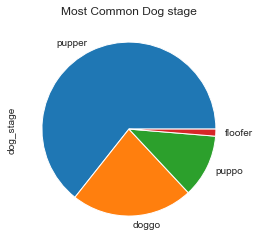

In [449]:
#plotting piechart for the most common dog stage
labels = np.full(len(df.dog_stage.value_counts()), '', dtype = object)
labels[0] = 'pupper'
labels[1] = 'doggo'
labels[2] = 'puppo'
labels[3] = 'floofer'
df.dog_stage.value_counts().plot(kind = 'pie', labels = labels)
#displaying the title
plt.title('Most Common Dog stage')

* .PUPPER IS THE MOST COMMON DOG STAGE.

#### 2. Twitter for Iphone is the most Used tweet Source

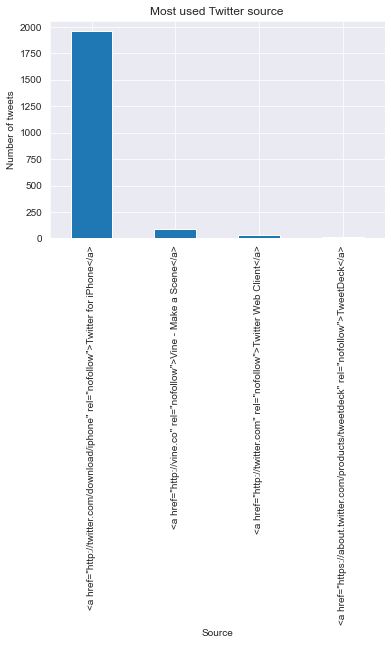

In [450]:
# pulling out the most used tweet source
tweet_source=df["source"].value_counts()[:30]
# ploting a bar chat
tweet_source.plot(kind='bar')
plt.ylabel('Number of tweets')
plt.xlabel('Source')
# displaying the title
plt.title("Most used Twitter source");

* .TWITTER FOR IPHONE IS THE MOST USED TWEET SOURCE

### 3.What do the row that have the highest retweet and favorite count have in common ?

In [452]:
# getting top 5 largest rows with retweet and favorite counts
highest_retweet= master_table.nlargest(5,'retweet_count')
highest_favorite= master_table.nlargest(5,'favorite_count')
# merging the columns to find the most common row amonst the highest count
common_row = highest_favorite.merge(highest_retweet, how = 'inner' ,indicator=False)
common_row

,tweet_id,timestamp,source,text,name,rating,dog_stage,jpg_url,confidence_point,breed_name,created_at,is_quote_status,retweet_count,favorite_count,quoted_status
0,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,13/10,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,0.825333,Labrador_retriever,2016-06-18 18:26:18+00:00,False,70262,144041,NaN
1,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,13/10,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,0.196015,Lakeland_terrier,2017-01-21 18:26:02+00:00,False,39714,123465,NaN
2,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,Stephan,13/10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,0.505370,Chihuahua,2016-12-09 06:17:20+00:00,False,51365,111027,NaN
3,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,13/10,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,0.503372,Eskimo_dog,2016-06-04 23:31:25+00:00,False,52583,106629,NaN


* .They all have 4 rows in common
* .They all have their ratings as 13/10
* .They where all tweeted from the same source(Twitter for iphone).